# [1] Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

In [2]:
dataset = pd.read_csv('biased_leukemia_dataset.csv')

# Feature Important

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Prepare dataset
X = dataset.drop(columns=['Leukemia_Status', 'Patient_ID'])
y = dataset['Leukemia_Status']

# 2. Encode categorical features
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4. Train temporary model to get feature importances
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_resampled, y_resampled)

# 5. Get top N feature names
top_n = 20
importances = rf_temp.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df['Feature'].head(top_n).tolist()

# 6. Filter dataset with top N features
X_top = X_resampled[top_features]

# 7. Final train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y_resampled, test_size=0.2, random_state=42)


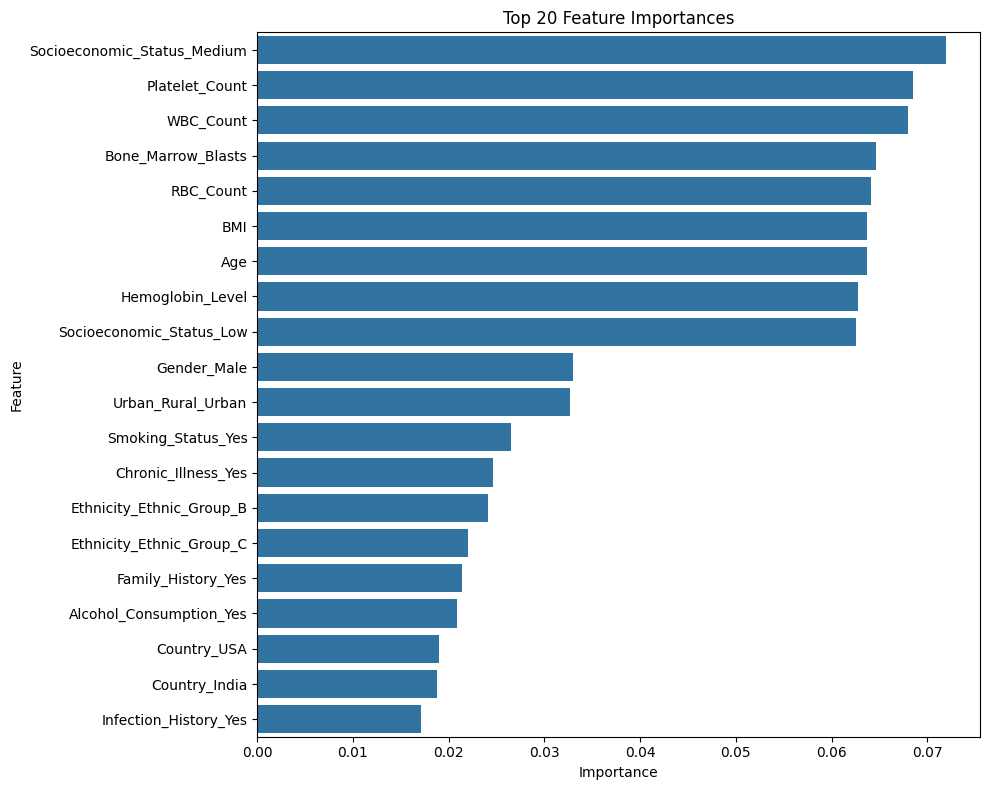

In [4]:
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [5]:
X_train

,Socioeconomic_Status_Medium,Platelet_Count,WBC_Count,Bone_Marrow_Blasts,RBC_Count,BMI,Age,Hemoglobin_Level,Socioeconomic_Status_Low
183969,False,265414,6853,25,5.751175,24.141801,57,14.139621,True
106367,True,203441,11289,69,4.330000,26.500000,73,16.100000,False
108579,False,319020,7390,47,5.440000,35.800000,13,14.900000,True
49763,True,172546,7178,75,4.510000,18.500000,8,14.000000,False
225925,True,277944,7184,60,4.740679,26.885804,57,15.264197,False
...,...,...,...,...,...,...,...,...,...
119879,False,239082,9710,0,4.860000,32.700000,67,13.400000,True
103694,False,265203,5257,90,5.950000,27.100000,54,16.900000,True
131932,True,330522,6493,27,5.070000,18.700000,7,15.500000,False
146867,False,218184,6299,59,5.106579,19.135254,43,14.683944,True


In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
X_test

,Socioeconomic_Status_Medium,Platelet_Count,WBC_Count,Bone_Marrow_Blasts,RBC_Count,BMI,Age,Hemoglobin_Level,Socioeconomic_Status_Low
106504,True,236990,2559,66,5.360000,29.300000,7,13.100000,False
164239,True,287534,7385,3,5.147094,29.708787,58,14.834124,True
20475,True,327756,8303,86,5.050000,24.300000,40,15.500000,False
48000,False,281156,10346,52,4.410000,26.800000,72,9.400000,False
189481,True,268737,6301,9,5.612823,23.442648,60,14.264707,True
...,...,...,...,...,...,...,...,...,...
31251,False,252634,8092,78,5.320000,23.600000,56,13.400000,False
225914,False,334672,5405,27,4.839162,23.366467,61,13.416767,True
133728,False,298133,6260,99,5.180000,20.300000,32,11.500000,True
9746,True,147622,8729,70,4.560000,23.700000,46,13.100000,False


In [8]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [9]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
X_train = np.array(X_train).astype(float)
X_test = np.array(X_test).astype(float)
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)


In [10]:
import shutil
shutil.rmtree('tuning_dir', ignore_errors=True)



# [4] Modeling with SMOTE Data Set

ANN

In [11]:
from keras_tuner import RandomSearch, Objective
from sklearn.metrics import f1_score, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Build model with hyperparameters
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Custom tuner (faster, no saving)
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(*args, **kwargs, verbose=0)
        val_data = kwargs['validation_data']
        y_pred = (model.predict(val_data[0]) > 0.5).astype("int32")
        f1 = f1_score(val_data[1], y_pred)
        self.oracle.update_trial(trial.trial_id, {"val_f1": f1})

# Initialize tuner
tuner = MyTuner(
    build_model,
    objective=Objective("val_f1", direction="max"),
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='leukemia_mlp'
)

# Run search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# 🚀 Rebuild and train best model manually (Option 1)
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = build_model(best_hp)

best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# Evaluate
y_pred_probs = best_model.predict(X_test)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Flatten in case it's shape (N, 1)
probs = y_pred_probs.flatten()

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find best threshold
best_thresh = thresholds[np.argmax(f1s)]
best_f1 = np.max(f1s)

print(f"\n📊 Best Threshold: {best_thresh:.3f}")
print(f"🏆 Best F1 Score at Threshold: {best_f1:.4f}")

# Predict using best threshold
y_pred = (probs > best_thresh).astype("int32")


print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

print("\n✅ Best Hyperparameters:")
for param, val in best_hp.values.items():
    print(f"{param}: {val}")


Trial 10 Complete [00h 03m 02s]
val_f1: 0.6676785079443214

Best val_f1 So Far: 0.6676785079443214
Total elapsed time: 00h 30m 30s
Epoch 1/30
6090/6090 [==============================] - 7s 1ms/step - loss: 12.5604 - accuracy: 0.5007 - val_loss: 0.6939 - val_accuracy: 0.4989
Epoch 2/30
6090/6090 [==============================] - 7s 1ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 3/30
6090/6090 [==============================] - 7s 1ms/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 4/30
6090/6090 [==============================] - 7s 1ms/step - loss: 0.6934 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 5/30
6090/6090 [==============================] - 7s 1ms/step - loss: 0.6934 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 6/30
6090/6090 [==============================] - 7s 1ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6935 - val_accuracy: 0.5011
Epoc

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from keras_tuner import RandomSearch, Objective
from sklearn.metrics import f1_score, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Build model with hyperparameters
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Custom tuner (faster, no saving)
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(*args, **kwargs, verbose=0)
        val_data = kwargs['validation_data']
        y_pred = (model.predict(val_data[0]) > 0.5).astype("int32")
        f1 = f1_score(val_data[1], y_pred)
        self.oracle.update_trial(trial.trial_id, {"val_f1": f1})

# Initialize tuner
tuner = MyTuner(
    build_model,
    objective=Objective("val_f1", direction="max"),
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='leukemia_mlp'
)

# Run search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# 🚀 Rebuild and train best model manually (Option 1)
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = build_model(best_hp)

best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# Evaluate
y_pred_probs = best_model.predict(X_test)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Flatten in case it's shape (N, 1)
probs = y_pred_probs.flatten()

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find best threshold
best_thresh = thresholds[np.argmax(f1s)]
best_f1 = np.max(f1s)

print(f"\n📊 Best Threshold: {best_thresh:.3f}")
print(f"🏆 Best F1 Score at Threshold: {best_f1:.4f}")

# Predict using best threshold
y_pred = (probs > best_thresh).astype("int32")


print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

print("\n✅ Best Hyperparameters:")
for param, val in best_hp.values.items():
    print(f"{param}: {val}")


Reloading Tuner from tuning_dir\leukemia_mlp\tuner0.json
Epoch 1/30
6090/6090 [==============================] - 7s 1ms/step - loss: 18.8110 - accuracy: 0.5008 - val_loss: 0.6944 - val_accuracy: 0.4989
Epoch 2/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.5011
Epoch 3/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.6934 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 4/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.6934 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 5/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.6934 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 6/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 7/30
6090/6090 [==============================] - 6s 1ms/step - loss: 0.

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

Fitting 5 folds for each of 20 candidates, totalling 100 fits


✅ Best Hyperparameters from Random Search:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

📊 Best Threshold: 0.455
🏆 Best F1 Score at Threshold: 0.8091

✅ Accuracy: 0.812

✅ Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     24304
         1.0       0.82      0.79      0.81     24415

    accuracy                           0.81     48719
   macro avg       0.81      0.81      0.81     48719
weighted avg       0.81      0.81      0.81     48719



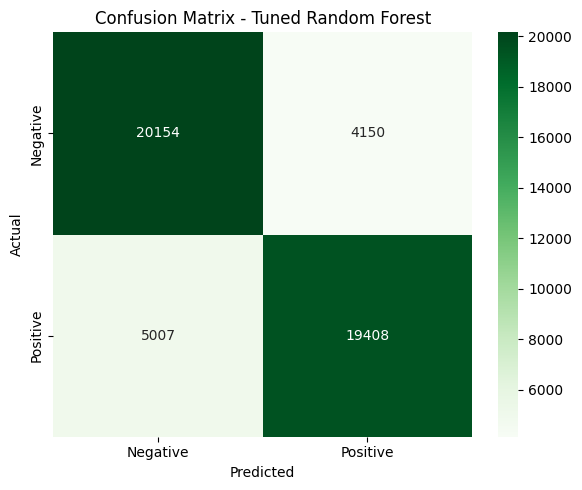


✅ ROC-AUC Score: 0.8874


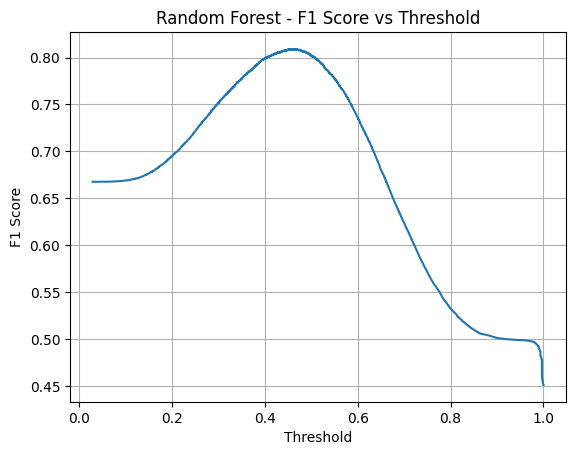

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [13]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    precision_recall_curve,
)

# 2. Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 3. Stratified K-Fold (to keep class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Initialize Random Forest with class weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 5. Run Randomized Search
rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs.fit(X_train, y_train)

# 6. Best parameters
print("✅ Best Hyperparameters from Random Search:")
print(rs.best_params_)

# 7. Predict probabilities
best_rf = rs.best_estimator_
y_proba = best_rf.predict_proba(X_test)[:, 1]

# 8. Threshold tuning based on F1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Filter thresholds in desired range
valid_mask = (thresholds >= 0.3) & (thresholds <= 0.7)
filtered_thresholds = thresholds[valid_mask]
filtered_f1s = f1s[:-1][valid_mask]  # align shape

if len(filtered_f1s) > 0:
    best_thresh = filtered_thresholds[np.argmax(filtered_f1s)]
    best_f1 = np.max(filtered_f1s)
else:
    print("⚠️ No thresholds in the selected range produced valid F1 scores. Using default threshold = 0.5.")
    best_thresh = 0.5
    best_f1 = f1_score(y_test, (y_proba > 0.5).astype("int32"))



print(f"\n📊 Best Threshold: {best_thresh:.3f}")
print(f"🏆 Best F1 Score at Threshold: {best_f1:.4f}")

# 9. Predict using best threshold
y_pred = (y_proba > best_thresh).astype("int32")

# 10. Evaluate
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# 11. Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.tight_layout()
plt.show()

# 12. ROC-AUC
roc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC-AUC Score: {roc:.4f}")

# 13. F1 vs Threshold plot
plt.plot(thresholds, f1s[:-1])
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Random Forest - F1 Score vs Threshold")
plt.grid(True)
plt.show()

# 14. Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,6))
plt.title('Top 20 Feature Importances (Tuned RF)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


TabNet

In [10]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# Check shape & dtype to confirm
print("✅ X_train_res dtype:", X_train.dtype, X_train.shape)
print("✅ y_train_res dtype:", y_train.dtype, y_train.shape)

✅ X_train_res dtype: float32 (194875, 9)
✅ y_train_res dtype: float32 (194875,)


In [11]:
import optuna
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_curve, f1_score,
    classification_report, confusion_matrix
)

# Use a smaller sample of training data for tuning (e.g. 50%)
sample_size = int(0.5 * len(X_train))
indices = np.random.choice(len(X_train), sample_size, replace=False)
X_sample = X_train[indices]
y_sample = y_train[indices]

# Convert DataFrames to NumPy (if needed)
X_sample_np = X_sample.values if hasattr(X_sample, 'values') else X_sample
y_sample_np = y_sample.values if hasattr(y_sample, 'values') else y_sample
X_val_np = X_test.values if hasattr(X_test, 'values') else X_test
y_val_np = y_test.values if hasattr(y_test, 'values') else y_test

# Ensure numeric arrays
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
X_val_np = X_test.values if hasattr(X_test, 'values') else X_test
y_val_np = y_test.values if hasattr(y_test, 'values') else y_test


# Optuna objective
def objective(trial):
    print(f"\n🔍 Trial {trial.number}")

    try:
        lr = trial.suggest_float('lr', 1e-3, 0.05, log=True)
        params = {
            'n_d': trial.suggest_categorical('n_d', [8, 16, 32]),
            'n_a': trial.suggest_categorical('n_a', [8, 16, 32]),
            'n_steps': trial.suggest_int('n_steps', 3, 8),
            'gamma': trial.suggest_float('gamma', 1.0, 2.0),
            'lambda_sparse': trial.suggest_float('lambda_sparse', 1e-5, 1e-2, log=True),
            'optimizer_params': {"lr": lr},
            'seed': 42,
            'verbose': 0,
            'device_name': 'cuda'
        }

        model = TabNetClassifier(**params)
        model.fit(
            X_train=X_sample_np, y_train=y_sample_np,
            eval_set=[(X_val_np, y_val_np)],
            eval_metric=['balanced_accuracy'],
            max_epochs=50,         # Reduced from 100
            patience=5,            # Faster early stopping
            batch_size=1024,
            virtual_batch_size=128
        )

        # Predict and find best threshold
        probs = model.predict_proba(X_val_np)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_val_np, probs)
        f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        best_f1 = np.max(f1s)
        best_thresh = thresholds[np.argmax(f1s)]

        print(f"✅ F1 = {best_f1:.4f} at threshold = {best_thresh:.3f}")
        return best_f1

    except Exception as e:
        print(f"❌ Trial failed: {e}")
        raise e

# Run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Reduced from 20

# Best hyperparameters
print("\n✅ Best Trial Hyperparameters:")
for k, v in study.best_trial.params.items():
    print(f"{k}: {v}")

# 🧪 Final model trained on FULL dataset
best = study.best_trial.params
final_model = TabNetClassifier(
    n_d=best['n_d'], n_a=best['n_a'], n_steps=best['n_steps'],
    gamma=best['gamma'], lambda_sparse=best['lambda_sparse'],
    optimizer_params={'lr': best['lr']},
    seed=42, verbose=1, device_name='cuda'
)

final_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['balanced_accuracy'],
    max_epochs=50,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128
)




c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-07 09:17:20,040] A new study created in memory with name: no-name-3bb66c22-c9dc-4204-bbcd-52cc655edea1



🔍 Trial 0

Early stopping occurred at epoch 21 with best_epoch = 16 and best_val_0_balanced_accuracy = 0.68684


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:20:15,215] Trial 0 finished with value: 0.7007014894634814 and parameters: {'lr': 0.010477500686898455, 'n_d': 8, 'n_a': 8, 'n_steps': 8, 'gamma': 1.768702176910918, 'lambda_sparse': 3.295582151700389e-05}. Best is trial 0 with value: 0.7007014894634814.


✅ F1 = 0.7007 at threshold = 0.379

🔍 Trial 1

Early stopping occurred at epoch 14 with best_epoch = 9 and best_val_0_balanced_accuracy = 0.67569


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:21:35,220] Trial 1 finished with value: 0.6912052380634669 and parameters: {'lr': 0.04818122752376212, 'n_d': 32, 'n_a': 32, 'n_steps': 5, 'gamma': 1.6174888622757895, 'lambda_sparse': 0.0039061211664930106}. Best is trial 0 with value: 0.7007014894634814.


✅ F1 = 0.6912 at threshold = 0.355

🔍 Trial 2

Early stopping occurred at epoch 27 with best_epoch = 22 and best_val_0_balanced_accuracy = 0.68598


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:25:19,571] Trial 2 finished with value: 0.695349225660763 and parameters: {'lr': 0.0011689668164580128, 'n_d': 8, 'n_a': 32, 'n_steps': 8, 'gamma': 1.3253049843459443, 'lambda_sparse': 8.637842070481935e-05}. Best is trial 0 with value: 0.7007014894634814.


✅ F1 = 0.6953 at threshold = 0.368

🔍 Trial 3

Early stopping occurred at epoch 19 with best_epoch = 14 and best_val_0_balanced_accuracy = 0.69369


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:26:47,440] Trial 3 finished with value: 0.7066510954963051 and parameters: {'lr': 0.016261585862304858, 'n_d': 8, 'n_a': 32, 'n_steps': 4, 'gamma': 1.5076693854457752, 'lambda_sparse': 0.0012976563979926832}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.7067 at threshold = 0.389

🔍 Trial 4

Early stopping occurred at epoch 34 with best_epoch = 29 and best_val_0_balanced_accuracy = 0.6912


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:32:09,540] Trial 4 finished with value: 0.7014780327270571 and parameters: {'lr': 0.0011729188633358084, 'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.2842682967504122, 'lambda_sparse': 0.0008399418198702707}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.7015 at threshold = 0.361

🔍 Trial 5
Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_balanced_accuracy = 0.69063


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:43:48,900] Trial 5 finished with value: 0.6989752683632028 and parameters: {'lr': 0.002820647886813028, 'n_d': 16, 'n_a': 16, 'n_steps': 6, 'gamma': 1.737398088360274, 'lambda_sparse': 1.4143443384536775e-05}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.6990 at threshold = 0.377

🔍 Trial 6

Early stopping occurred at epoch 10 with best_epoch = 5 and best_val_0_balanced_accuracy = 0.68921


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:46:45,338] Trial 6 finished with value: 0.6978502670204154 and parameters: {'lr': 0.013264470086346493, 'n_d': 16, 'n_a': 32, 'n_steps': 7, 'gamma': 1.2013053463409653, 'lambda_sparse': 0.00013049715904072252}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.6979 at threshold = 0.360

🔍 Trial 7

Early stopping occurred at epoch 23 with best_epoch = 18 and best_val_0_balanced_accuracy = 0.68581


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:49:10,520] Trial 7 finished with value: 0.6979794585814328 and parameters: {'lr': 0.021174175298585, 'n_d': 32, 'n_a': 8, 'n_steps': 6, 'gamma': 1.5906830537113001, 'lambda_sparse': 0.0014019700859774899}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.6980 at threshold = 0.349

🔍 Trial 8

Early stopping occurred at epoch 15 with best_epoch = 10 and best_val_0_balanced_accuracy = 0.68302


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:51:01,782] Trial 8 finished with value: 0.6940225578790747 and parameters: {'lr': 0.010010814962217467, 'n_d': 8, 'n_a': 16, 'n_steps': 7, 'gamma': 1.701179025177733, 'lambda_sparse': 0.0009282145020656322}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.6940 at threshold = 0.358

🔍 Trial 9

Early stopping occurred at epoch 17 with best_epoch = 12 and best_val_0_balanced_accuracy = 0.68933


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-07 09:52:46,267] Trial 9 finished with value: 0.7021028389452217 and parameters: {'lr': 0.020659637602687065, 'n_d': 32, 'n_a': 16, 'n_steps': 5, 'gamma': 1.693363598630184, 'lambda_sparse': 0.0037169342228724474}. Best is trial 3 with value: 0.7066510954963051.


✅ F1 = 0.7021 at threshold = 0.395

✅ Best Trial Hyperparameters:
lr: 0.016261585862304858
n_d: 8
n_a: 32
n_steps: 4
gamma: 1.5076693854457752
lambda_sparse: 0.0012976563979926832


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.57556 | val_0_balanced_accuracy: 0.66332 |  0:00:08s
epoch 1  | loss: 0.54736 | val_0_balanced_accuracy: 0.67929 |  0:00:16s
epoch 2  | loss: 0.54392 | val_0_balanced_accuracy: 0.68202 |  0:00:24s
epoch 3  | loss: 0.54485 | val_0_balanced_accuracy: 0.68662 |  0:00:32s
epoch 4  | loss: 0.53953 | val_0_balanced_accuracy: 0.68965 |  0:00:40s
epoch 5  | loss: 0.53995 | val_0_balanced_accuracy: 0.69127 |  0:00:49s
epoch 6  | loss: 0.53884 | val_0_balanced_accuracy: 0.69242 |  0:00:57s
epoch 7  | loss: 0.54088 | val_0_balanced_accuracy: 0.68794 |  0:01:05s
epoch 8  | loss: 0.53869 | val_0_balanced_accuracy: 0.69373 |  0:01:13s
epoch 9  | loss: 0.53725 | val_0_balanced_accuracy: 0.69729 |  0:01:21s
epoch 10 | loss: 0.53576 | val_0_balanced_accuracy: 0.69077 |  0:01:30s
epoch 11 | loss: 0.53678 | val_0_balanced_accuracy: 0.69851 |  0:01:38s
epoch 12 | loss: 0.53495 | val_0_balanced_accuracy: 0.69822 |  0:01:45s
epoch 13 | loss: 0.53415 | val_0_balanced_accuracy: 0.70047 |  0

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [12]:
# 📈 Final evaluation

# --- Predict probabilities ---
final_probs = final_model.predict_proba(X_val_np)[:, 1]

# --- Calculate precision-recall-threshold values ---
precisions, recalls, thresholds = precision_recall_curve(y_val_np, final_probs)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# --- Restrict threshold range to 0.3–0.7 ---
valid_idx = np.where((thresholds >= 0.3) & (thresholds <= 0.7))[0]
if len(valid_idx) == 0:
    print("⚠️ No thresholds found in range 0.3–0.7, falling back to full range.")
    best_thresh = thresholds[np.argmax(f1s)]
else:
    best_thresh = thresholds[valid_idx[np.argmax(f1s[valid_idx])]]

print(f"\n🏁 Final Best Threshold (0.3–0.7 range): {best_thresh:.3f}")

# --- Predict using best threshold ---
final_preds = (final_probs > best_thresh).astype(int)

# --- Evaluation ---
print("\n✅ Final Classification Report:")
print(classification_report(y_val_np, final_preds))
print("✅ Final Accuracy:", round(accuracy_score(y_val_np, final_preds), 4))

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_val_np, final_preds))


🏁 Final Best Threshold (0.3–0.7 range): 0.371

✅ Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.47      0.58     24304
         1.0       0.61      0.84      0.71     24415

    accuracy                           0.66     48719
   macro avg       0.68      0.66      0.64     48719
weighted avg       0.68      0.66      0.64     48719

✅ Final Accuracy: 0.6565

✅ Confusion Matrix:
[[11404 12900]
 [ 3833 20582]]
